In [ ]:
%load_ext autoreload 
%autoreload 2 



In [ ]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # for subplots
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import tensorflow as tf

from src.utilities.plot_helpers import generate_random_colors
from src.modeling.experiments.binned_trial_experiment_01 import split_data

from src.utilities.pandas_helpers import get_features


plt.rcParams['path.simplify_threshold'] = 1.0
plt.rcParams['agg.path.chunksize'] = 2000 


In [4]:
DATA_PATH = '/projects/p31961/gaby_data/aggregated_data/data_pipeline_full_dataset/datasets/full_dataset.parquet.gzip'

In [5]:
data = pd.read_parquet(DATA_PATH)
data

,time,mouse_id,sex_M,day,trial,trial_count,learning_phase,event_cue,event_escape,event_avoid,latency,event_shock,sensor_D1,sensor_D2,sensor_DA,signal
0,-25.000000,12,0,5,0,115,0,1,0,0,0.00,0,0,1,0,-0.155359
1,-24.901531,12,0,5,0,115,0,1,0,0,0.00,0,0,1,0,-0.420553
2,-24.803064,12,0,5,0,115,0,1,0,0,0.00,0,0,1,0,-1.592294
3,-24.704596,12,0,5,0,115,0,1,0,0,0.00,0,0,1,0,-1.268734
4,-24.606127,12,0,5,0,115,0,1,0,0,0.00,0,0,1,0,-0.210176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858795,19.606127,1,0,4,1,87,0,0,1,0,7.54,0,1,0,0,0.299603
5858796,19.704596,1,0,4,1,87,0,0,1,0,7.54,0,1,0,0,-0.249408
5858797,19.803064,1,0,4,1,87,0,0,1,0,7.54,0,1,0,0,-0.486369
5858798,19.901531,1,0,4,1,87,0,0,1,0,7.54,0,1,0,0,-0.146374


In [10]:

test = data.query("sensor_DA==1 & event_cue==1").assign(angles = (2 * np.pi * data.time)/np.max(data.time))
                  
d1 = data.query("sensor_D1==1 & event_cue==1").assign(angles = (2 * np.pi * data.time)/np.max(data.time), 
                   normalized_signal = (data.signal - np.min(data.signal))/ (np.max(data.signal) - np.min(data.signal)))
d2 = data.query("sensor_D2==1 & event_cue==1").assign(angles = (2 * np.pi * data.time)/np.max(data.time), 
                   normalized_signal = (data.signal - np.min(data.signal))/ (np.max(data.signal) - np.min(data.signal)))



In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ax1 = fig.add_subplot(222, polar = True)
# ax1.set_rticks([])/
ax1.plot(test.angles, test.signal, color = "blue", linewidth = 0.01, alpha = 0.5)


<Axes: xlabel='day'>

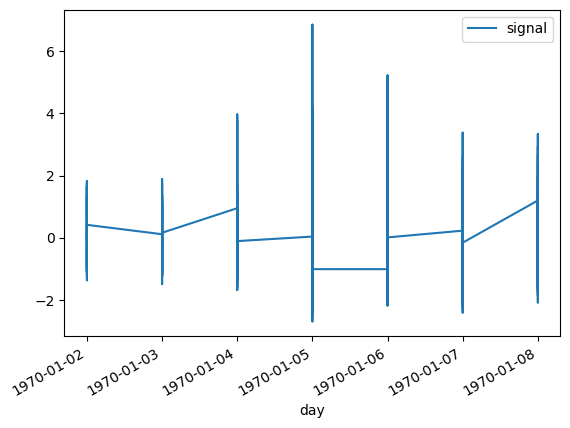

In [42]:
(
    data
    .sort_values(by=['mouse_id','trial_count', 'time'])
    .assign(
        time= pd.to_datetime(data.time, unit = 's'), 
            day= pd.to_datetime(data.day, unit = 'd'),
            trial_count= pd.to_datetime(data.trial_count, unit = 'm')
            # time_series= lambda df_: (pd.to_datetime(df_.day) 
            #                           + pd.to_datetime(df_.trial_count)
            #                           + pd.to_datetime(df_.time)
            )
    # )
    .query("sensor_DA==1 & event_cue==1")
    .groupby(['day', 'trial_count', 'time'], as_index=False).mean()
    .plot(x='day', y='signal', kind='line')
)